In [1]:
import os
root = "/content/drive/MyDrive/Deep Learning"
os.chdir(root)

In [2]:
os.listdir()

['Deep Learning.ipynb', 'logs', 'Callbacks in Deep Learning.ipynb']

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.8.0'

In [5]:
tf.keras.__version__

'2.8.0'

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A simple classifier using keras.s sequential API

## Dataset MNIST
* its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* Also known as aka hello world of ANN

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [10]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('uint8'))

In [11]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [12]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [13]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = x_test/255.

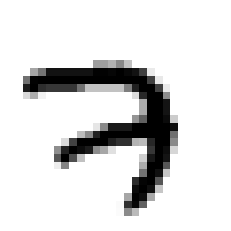

7

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

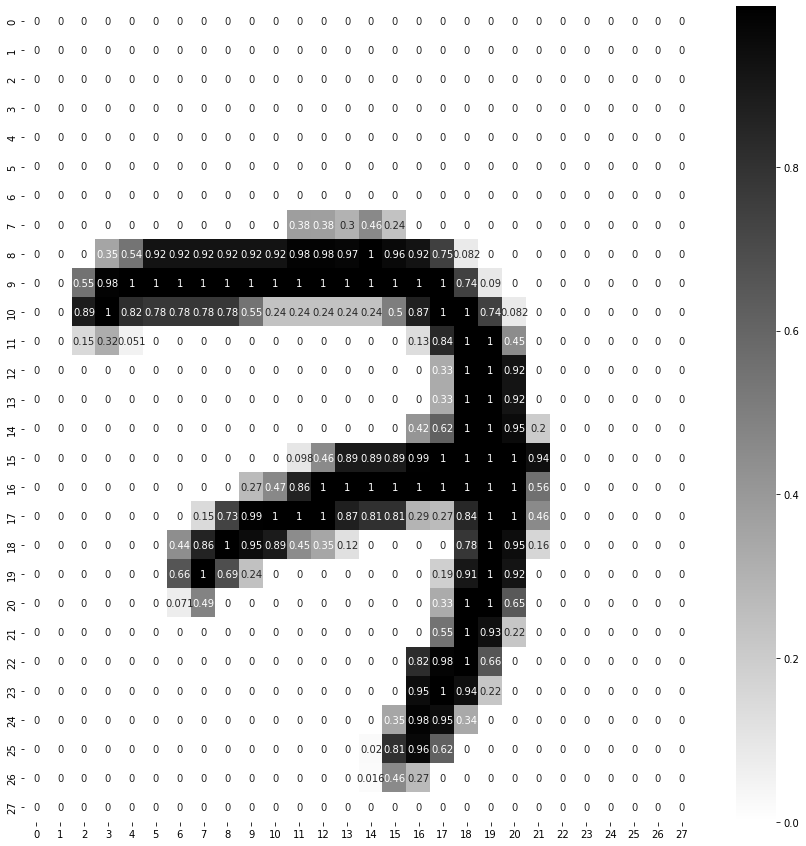

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [16]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
          tf.keras.layers.Dense(300,activation='relu', name='hiddenLayer1'),
          tf.keras.layers.Dense(100,activation='relu', name='hiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax', name='outputLayer')
]

In [17]:
model = tf.keras.models.Sequential(LAYERS)

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
[784*300+300,300*100+100,100*10+10]

[235500, 30100, 1010]

In [21]:
sum([784*300+300,300*100+100,100*10+10])

266610

In [22]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [23]:
hidden1.get_weights()

[array([[ 0.03550281,  0.05480647, -0.00518096, ..., -0.06436382,
          0.07067053, -0.02486805],
        [ 0.01017883, -0.04461517,  0.0347862 , ...,  0.03900693,
          0.02774255,  0.05940813],
        [-0.0455009 ,  0.03109854,  0.0685785 , ...,  0.03389762,
          0.05727376,  0.04376901],
        ...,
        [-0.05594677,  0.06657496,  0.03088522, ..., -0.06599179,
          0.05332677,  0.0017448 ],
        [ 0.00262503, -0.01784776, -0.03537801, ..., -0.06071575,
         -0.07100821, -0.03657231],
        [ 0.06406978, -0.02718764, -0.01573874, ...,  0.06596936,
          0.04135905,  0.00890527]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

loss_function(actual, pred) = error

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Important -
* **Epochs**: Integer.

* Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.

* Number of samples per gradient update. If unspecified, batch_size will default to 32.

* **NOTE**: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

* Number of samples per validation batch.

* If unspecified, will default to batch_size.

* **NOTE**: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).


* **[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit )**

In [28]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.6254 - accuracy: 0.8355 - val_loss: 0.3067 - val_accuracy: 0.9140
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2883 - accuracy: 0.9178 - val_loss: 0.2326 - val_accuracy: 0.9378
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2339 - accuracy: 0.9329 - val_loss: 0.2012 - val_accuracy: 0.9462
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1991 - accuracy: 0.9434 - val_loss: 0.1713 - val_accuracy: 0.9536
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1736 - accuracy: 0.9507 - val_loss: 0.1615 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1537 - accuracy: 0.9562 - val_loss: 0.1463 - val_accuracy: 0.9634
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1378 - accuracy: 0.9615 - val_loss: 0.1297 - val_accuracy

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9768


[0.06936819106340408, 0.9768000245094299]

In [30]:
model.save("model.h5")

In [31]:
loaded_model = tf.keras.models.load_model("model.h5")

In [32]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9768


[0.06936819106340408, 0.9768000245094299]

In [33]:
history.history

{'accuracy': [0.8355273008346558,
  0.9178000092506409,
  0.9329272508621216,
  0.943363606929779,
  0.9506545662879944,
  0.9562181830406189,
  0.9614909291267395,
  0.965145468711853,
  0.9678909182548523,
  0.9708545207977295,
  0.973690927028656,
  0.9749636650085449,
  0.9770908951759338,
  0.9786909222602844,
  0.9800727367401123,
  0.9816363453865051,
  0.9827636480331421,
  0.9839818477630615,
  0.9855272769927979,
  0.9864545464515686,
  0.9868000149726868,
  0.9882181882858276,
  0.9892363548278809,
  0.9899272918701172,
  0.9902363419532776,
  0.991454541683197,
  0.9918363690376282,
  0.9925090670585632,
  0.9930182099342346,
  0.9937090873718262],
 'loss': [0.6253962516784668,
  0.2882952094078064,
  0.23394031822681427,
  0.19911719858646393,
  0.17356820404529572,
  0.15372440218925476,
  0.13778287172317505,
  0.12502722442150116,
  0.11427713930606842,
  0.10456473380327225,
  0.09627778828144073,
  0.08927331864833832,
  0.08249783515930176,
  0.07712963968515396,
  0

In [34]:
type(history.history)

dict

In [35]:
data = pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.625396,0.835527,0.306688,0.9140
1,0.288295,0.917800,0.232617,0.9378
2,0.233940,0.932927,0.201226,0.9462
3,0.199117,0.943364,0.171262,0.9536
4,0.173568,0.950655,0.161456,0.9580
5,0.153724,0.956218,0.146324,0.9634
6,0.137783,0.961491,0.129708,0.9652
7,0.125027,0.965145,0.120291,0.9678
8,0.114277,0.967891,0.114782,0.9698
9,0.104565,0.970855,0.107756,0.9714


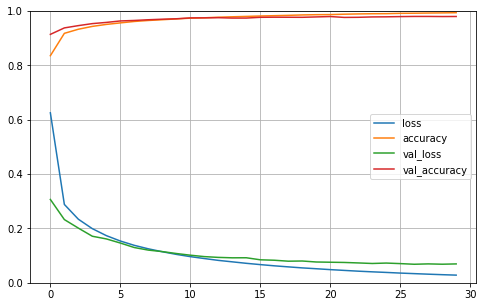

In [36]:
data.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
X_new = X_test[:3]

y_proba = model.predict(X_new)
y_proba

array([[2.7854071e-06, 3.3795109e-07, 1.6272343e-05, 1.0226271e-03,
        1.7228349e-08, 6.2701884e-07, 2.5143006e-11, 9.9887079e-01,
        2.4093395e-06, 8.4187501e-05],
       [6.6835069e-06, 2.2815907e-04, 9.9961770e-01, 9.0381160e-05,
        4.7621202e-11, 9.5299885e-07, 3.7079742e-06, 5.7668141e-12,
        5.2463478e-05, 3.1105188e-11],
       [3.8767603e-06, 9.9691427e-01, 2.0347524e-04, 8.3366736e-05,
        4.0083620e-04, 7.2821953e-05, 3.3860091e-05, 8.6402986e-04,
        1.3982649e-03, 2.5088471e-05]], dtype=float32)

In [38]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [40]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

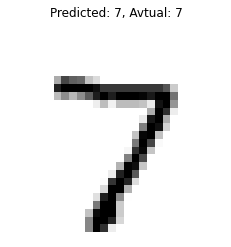

----------------------------------------------------------------------------------------------------------------------------------------------------------------


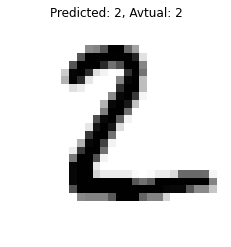

----------------------------------------------------------------------------------------------------------------------------------------------------------------


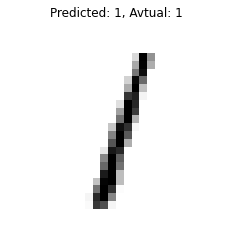

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [41]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Avtual: {actual}")
  plt.axis("off")
  plt.show()
  print("--------"*20)